### Choose a small sample of a labelled dataset.
* Do preprocessing.
* Shuffle well.
* Take a small sample (s0).
* Divide s0 into training, validation, and test sets (s1).

### Perform genetic algorithm
* Chromosomes: Learning-rate, regularization-rate, and sample-size.
* Cost components: Loss function (MSE) (training and validation?), CPU-time till convergence 

### Prototyping Dataset
https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data

* Years Experience (Decimal, Feature)
* Salary (Decimal, Label)

In [6]:
import pandas as pd
import numpy as np

p0 = pd.read_csv('../datasets/salary/dataset.csv', header=0, usecols=['Years', 'Salary'], names=[None, 'Years', 'Salary'])
p0.describe()

,Years,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


### Linear Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

model = SGDRegressor(
    learning_rate = 'constant',
    eta0 = 0.01, # Learning-rate
    penalty = 'l2', # Regularization type
    alpha = 0.1, # Regularization type
    max_iter = 1000
) # Not sure how to adjust batch-sizes or anything like that yet.

model.fit(p0['Years'].values.reshape(-1, 1), p0['Salary'].values)

predictions = model.predict(p0['Years'].values.reshape(-1, 1))
mean_squared_error(p0['Salary'], predictions)

36981697.56032661

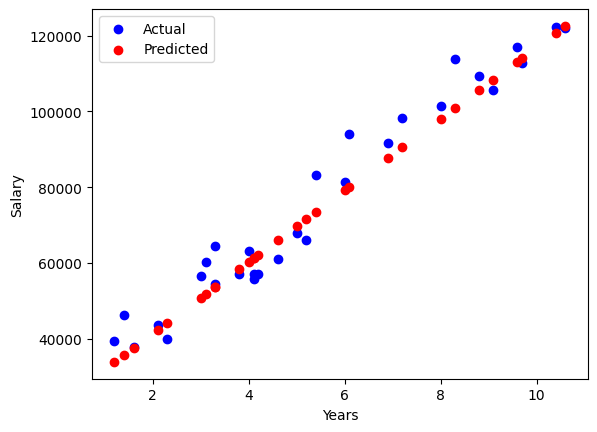

In [10]:
import matplotlib.pyplot as plt

plt.scatter(p0['Years'].values.reshape(-1, 1), p0['Salary'].values, label='Actual', color='blue')
plt.scatter(p0['Years'].values.reshape(-1, 1), predictions, label='Predicted', color='red')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.legend()
plt.show()

### Measure CPU time of model fitting
https://www.geeksforgeeks.org/python/time-process_time-function-in-python/

In [ ]:
import time

def fit():
    model = SGDRegressor(
        learning_rate = 'constant',
        eta0 = 0.01,
        penalty = 'l2',
        alpha = 0.1,
        max_iter = 1000
    )

    model.fit(p0['Years'].values.reshape(-1, 1), p0['Salary'].values)


start = time.perf_counter() # process_time() for longer expected durations

fit()

end = time.perf_counter()

print(f"{end-start} seconds")

0.0006621999782510102 seconds
